In [48]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots
import statsmodels.api as sm  # For estimating statistical models
import io
from google.colab import files  # For file operations in Google Colab
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.stats.api as sms
import plotly.express as px
import matplotlib.dates as mdates

# Upload Without_TOT Excel Files

In [49]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file

Without_TOT = pd.read_excel(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame
Without_TOT.to_csv('/content/data.csv', index=False)
print("Data saved as CSV file.")

Saving Without_TOT.xlsx to Without_TOT.xlsx
Data saved as CSV file.


# Change Season Data Type to DateTime

In [50]:
# Change 'Season' column to datetime format
Without_TOT['Season'] = pd.to_datetime(Without_TOT['Season'], format = "%Y-%y")
Without_TOT['Season'].unique()

array(['2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [51]:
# # Without_TOT 2000-2019
Without_TOT['Season'] = Without_TOT['Season'].apply(lambda x: x.year - 1 if pd.notnull(x) else x)
Without_TOT['Season'] = pd.to_datetime(Without_TOT['Season'], format='%Y')
Without_TOT['Season'] = pd.to_datetime(Without_TOT['Season'])
Without_TOT['Season'].unique()

array(['2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

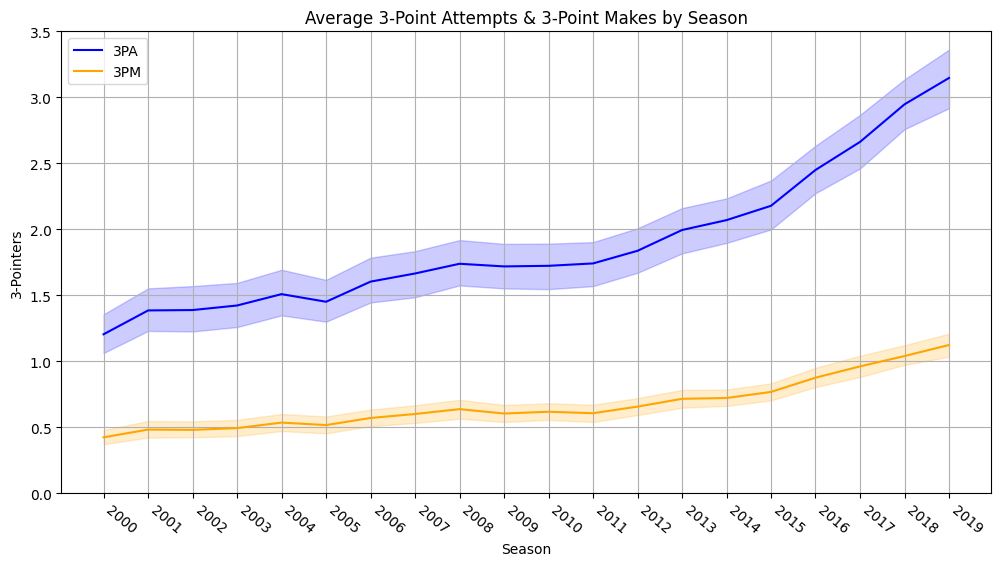

In [71]:
# 3PA, 3PM Time Series Graphs
plt.figure(figsize=(12, 6))

# Create line plots with labels
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['3PA'], label='3PA', color='blue')
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['3P'], label='3PM', color='orange')

# Set major ticks to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Add y-axis limits
plt.ylim(0, 3.5)

# Rotate x-axis tick labels
plt.xticks(rotation=-40, ha='left')

# Add plot labels
plt.title('Average 3-Point Attempts & 3-Point Makes by Season')
plt.xlabel('Season')
plt.ylabel('3-Pointers')

# Display the legend & gridlines
plt.legend()
plt.grid(True)

plt.show()

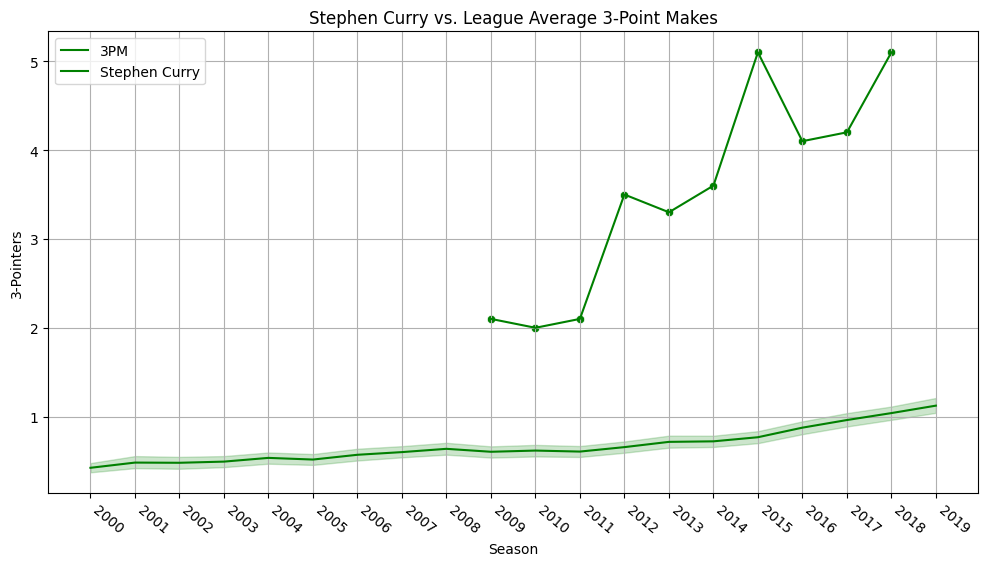

In [62]:
# Stephen Curry vs. 3PM Time Series Graphs
plt.figure(figsize=(12, 6))

# subset Without_TOT to Stephen Curry statistics
stephen_curry_data = Without_TOT[Without_TOT['Player'] == 'Stephen Curry']

# Create line plots with labels
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['3P'], label='3PM', color='green')
sns.lineplot(x=stephen_curry_data['Season'], y=stephen_curry_data['3P'], label='Stephen Curry', color = 'green')
sns.scatterplot(x=stephen_curry_data['Season'], y=stephen_curry_data['3P'], color = 'green')

# Set major ticks to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis tick labels
plt.xticks(rotation=-40, ha='left')

# Add plot labels
plt.title('Stephen Curry vs. League Average 3-Point Makes')
plt.xlabel('Season')
plt.ylabel('3-Pointers')  # Adjust the y-axis label based on your data

# Display the legend & gridlines
plt.legend()
plt.grid(True)

plt.show()

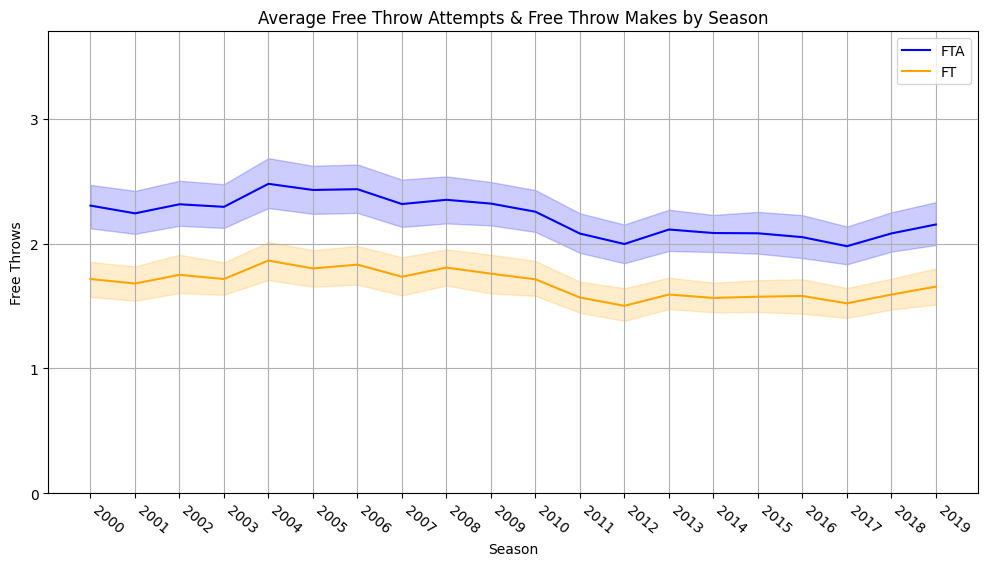

In [75]:
# FTA, FTM Time Series Graphs
plt.figure(figsize=(12, 6))

# Create line plots with labels
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['FTA'], label='FTA', color='blue')
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['FT'], label='FT', color='orange')

# Set major ticks to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis tick labels
plt.xticks(rotation=-40, ha='left')

# Set y-axis limits
plt.ylim(0, 3.7)

# Set custom y-axis ticks
plt.yticks([0, 1, 2, 3])

# Add plot labels
plt.title('Average Free Throw Attempts & Free Throw Makes by Season')
plt.xlabel('Season')
plt.ylabel('Free Throws')

# Display the legend & gridlines
plt.legend()
plt.grid(True)

plt.show()

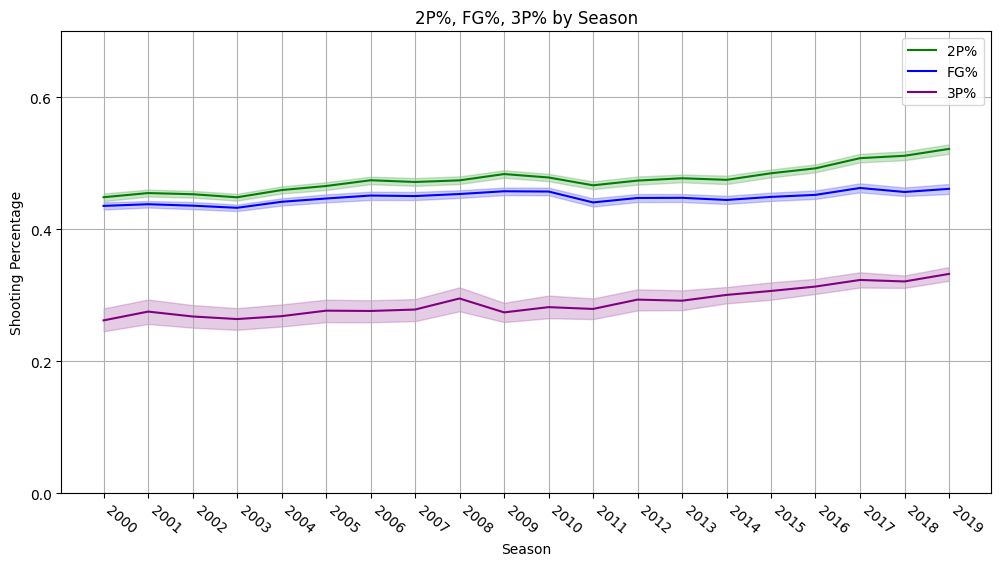

In [67]:
# 2P%, 3P%, FG% Time Series Graphs
plt.figure(figsize=(12, 6))

# Create line plots with labels
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['2P%'], label='2P%', color='green')
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['FG%'], label='FG%', color='blue')
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['3P%'], label='3P%', color='purple')

# Set major ticks to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis tick labels
plt.xticks(rotation=-40, ha='left')

# Set y-axis limits
plt.ylim(0, 0.7)

# Set custom y-axis ticks
plt.yticks([0, 0.2, 0.4, 0.6])

# Add plot labels
plt.title('2P%, FG%, 3P% by Season')
plt.xlabel('Season')
plt.ylabel('Shooting Percentage')

# Display the legend & gridlines
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

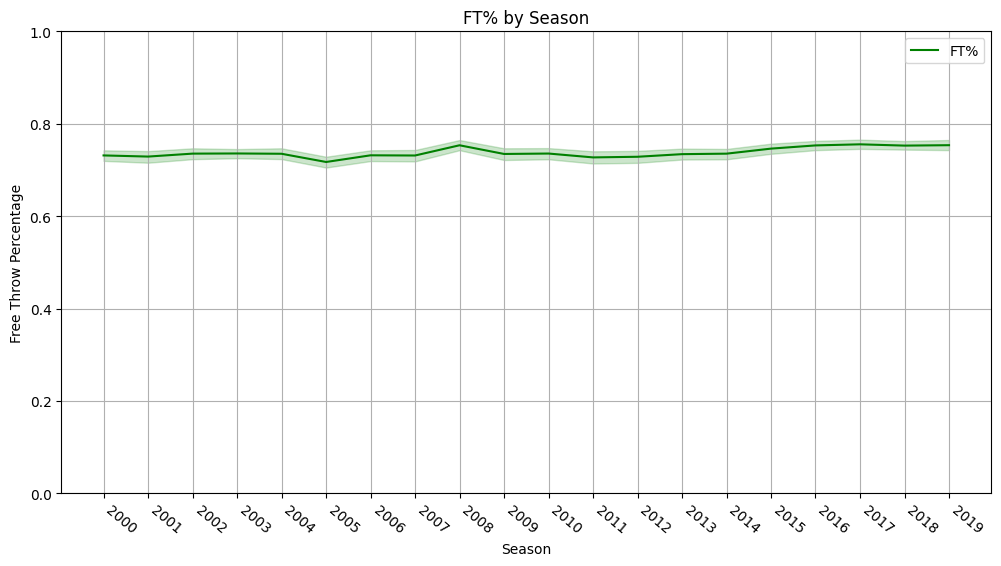

In [78]:
# FT% Time Series Graph
plt.figure(figsize=(12, 6))

# Create line plots with labels
sns.lineplot(x=Without_TOT['Season'], y=Without_TOT['FT%'], label='FT%', color='green')

# Set major ticks to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis tick labels
plt.xticks(rotation=-40, ha='left')

# Set y-axis limits
plt.ylim(0, 1)

# Set custom y-axis ticks
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# Add plot labels
plt.title('FT% by Season')
plt.xlabel('Season')
plt.ylabel('Free Throw Percentage')

# Display the legend & gridlines
plt.legend()
plt.grid(True)

plt.show()